## Import libraries

In [43]:
# harp-python for data interface, pandas for dataframe manipulation, matplotlib for plotting
import harp
import pandas as pd 
import matplotlib.pyplot as plt

## Load device reader

In [44]:
device = harp.create_reader("Data/Hobgoblin.harp")

## Load register data

In [45]:
# The data for each register can be loaded into a pandas dataframe by simply calling read() on the register name
# For a full list of registers, refer to the API documentation at https://harp-tech.org/api/Harp.Hobgoblin.html
digital_output_set = device.DigitalOutputSet.read()
digital_output_clear = device.DigitalOutputClear.read()
digital_input_state = device.DigitalInputState.read()

## Inspect dataframes

In [46]:
print("LED onset time")
print(digital_output_set.head())
print("\nLED offset time")
print(digital_output_clear.head())
print("\nButton press time")
print(digital_input_state.head())

LED onset time
           GP15   GP16   GP17   GP18   GP19   GP20   GP21   GP22
Time                                                            
59.401248  True  False  False  False  False  False  False  False
62.462496  True  False  False  False  False  False  False  False
64.966368  True  False  False  False  False  False  False  False
67.409632  True  False  False  False  False  False  False  False
69.610400  True  False  False  False  False  False  False  False

LED offset time
           GP15   GP16   GP17   GP18   GP19   GP20   GP21   GP22
Time                                                            
60.440384  True  False  False  False  False  False  False  False
62.964448  True  False  False  False  False  False  False  False
65.399520  True  False  False  False  False  False  False  False
67.613184  True  False  False  False  False  False  False  False
69.932704  True  False  False  False  False  False  False  False

Button press time
             GP2    GP3   GP12   GP13  

## Preprocess dataframes

In [47]:
# Discard unused channels
digital_output_set = digital_output_set["GP15"]
digital_output_clear = digital_output_clear["GP15"]
digital_input_state = digital_input_state["GP2"]

# Keep button presses
digital_input_state = digital_input_state[digital_input_state == True]

## Plot session

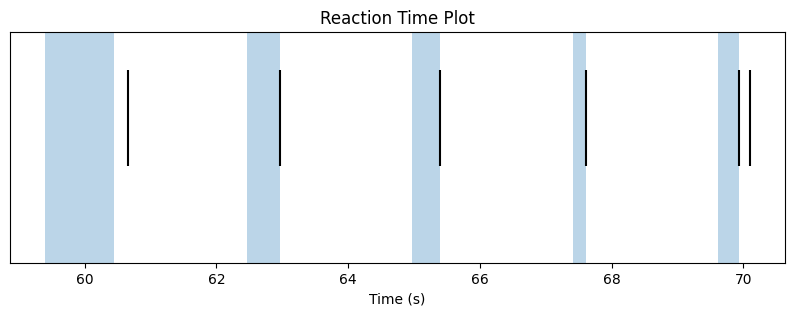

In [48]:
fig, ax = plt.subplots(figsize=(10, 3))

# Extract times
press_times = digital_input_state.index

# Plot LED epochs as shaded blue regions
for start, end in zip(digital_output_set.index, digital_output_clear.index):
    ax.axvspan(start, end, alpha=0.3)

# Plot button press as black lines
ax.vlines(digital_input_state.index, ymin=0.5, ymax=1, color = 'black')

# Cleanup plot
ax.set_ylim(0, 1.2)
ax.set_yticks([])
ax.set_xlabel("Time (s)")
ax.set_title("Reaction Time Plot")

plt.show()

## Calculate hit response time

In [49]:
# Keep only 1st button press that occurs within response_window/timeout
valid_response_times = []
for trial_number in range(len(digital_output_set.index)):
    led_on = digital_output_set.index[trial_number]
    response_window = digital_output_clear.index[trial_number] - digital_output_set.index[trial_number]
    for button_press in digital_input_state.index:
        response_time = button_press - led_on
        if 0 < response_time < response_window:
            valid_response_times.append(response_time)
            break

## Calculate hit/miss percentage

In [50]:
num_valid_responses = len(valid_response_times)
num_total_trials = len(digital_output_set.index)
hit_percentage = num_valid_responses / num_total_trials * 100
print(f"There were {num_valid_responses} valid responses out of {num_total_trials} trials, giving a hit rate of {hit_percentage}%")

There were 4 valid responses out of 5 trials, giving a hit rate of 80.0%


## Plot hit response times

<Axes: >

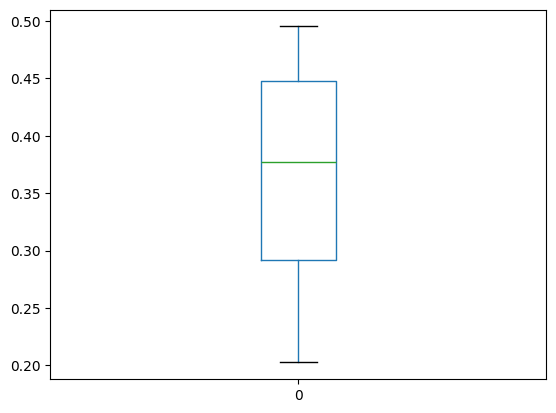

In [56]:
pd.DataFrame(valid_response_times).boxplot(grid = False)